<img src="Athlete.jpg" />

The following jupyter notebook concerns the performance of sport athletes based on a number of variables. In this notebook, I am required to:

1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

3. Synthesise/simulate a data set as closely matching their properties as possible.

4. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.





## Introduction

The real world phenomenon this juypter notebook is going to concentrate on is the performance of sport athletes. Analysing sport performance in any sport allows both players and coaches to acquire information and to dissect this information to improve player performance.

We will investigate factors that have an effect on players performance. We will provide detail analysis on each factor and their relationship with each other. These factors include age, hours trained, alcohol, nutrition & recovery hours. Once this analysis is complete we will then create a data set based on the data collected.  

We will use a sample size of 150 atheletes that will be randomly generated. We will import all necessary libraries from Python. 

## Factors

#### Age

The first factor we are going to look at is the age of an athlete. Athletes performance decreases as they get older. Generally speaking, athletes start to see physical declines at age 26, give or take. (This would seem in line with the long-standing notion in baseball that players tend to hit their peak anywhere from ages 27 to 30.) For swimmers, the news is more sobering, as the mean peak age is 21. For chess grandmasters, participating in an activity that relies more than mental acuity and sharpness rather than brute, acquired physicality, the peak age is closer to 31.4. [[Wired]](https://www.wired.com/2011/07/athletes-peak-age/)

One big reason we see declines in aerobic (or endurance) athletic performance with age is that our bodies can’t use oxygen as effectively. The maximal ability to utilize oxygen (VO2max) is a predictor of endurance performance across ages. VO2max is a numerical value that describes how much oxygen your body can use per kilogram of body weight.
VO2max is affected by how well your body can bring oxygen into the lungs, how well this is carried in our blood to the working muscles, and how much oxygen the muscles can use to fuel contraction. [[Mashable]](https://mashable.com/2015/07/07/aging-athletic-performance/?europe=true#YZXRDfVzwaqZ)

The most relevant distribution for the age factor would be the normal distribution. The reason for this is that the majority of the values sits around the mean which is 27 when athletes hit the peak. Before the age of 27, athletes are learning their trade before they reach their peak. While after factors start negatively affecting athletes performance. 

We will create random points between 19 and 33 as our age range as studies have indicated that on average professional athletes retire at the age of 33. [[Voa]]( https://www.voanews.com/a/professional-athletes-prepare-for-life-after-sports-118377659/163130.html)

In [9]:
%matplotlib inline

#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections, numpy
import seaborn as sns

# Fixing random state for reproducibility
np.random.seed(666)

#Randomly generate numbers age around the mean of 26 and std 4
age = np.random.normal(26, 4, size=150).round()
age

array([ 29.,  28.,  31.,  30.,  24.,  26.,  26.,  22.,  29.,  23.,  28.,
        22.,  30.,  23.,  25.,  24.,  22.,  24.,  19.,  27.,  19.,  29.,
        27.,  29.,  27.,  31.,  32.,  24.,  23.,  25.,  23.,  29.,  26.,
        23.,  27.,  25.,  24.,  23.,  30.,  27.,  25.,  30.,  25.,  26.,
        22.,  21.,  27.,  27.,  24.,  32.,  25.,  32.,  26.,  26.,  30.,
        31.,  24.,  20.,  19.,  26.,  14.,  40.,  25.,  22.,  28.,  27.,
        23.,  28.,  27.,  30.,  26.,  28.,  26.,  29.,  24.,  33.,  29.,
        25.,  29.,  29.,  22.,  26.,  27.,  28.,  22.,  24.,  24.,  26.,
        18.,  25.,  20.,  25.,  27.,  24.,  22.,  32.,  26.,  22.,  31.,
        33.,  28.,  28.,  23.,  33.,  23.,  23.,  24.,  30.,  23.,  35.,
        33.,  26.,  27.,  26.,  27.,  26.,  30.,  18.,  26.,  23.,  20.,
        19.,  25.,  29.,  32.,  22.,  27.,  20.,  31.,  22.,  27.,  27.,
        28.,  31.,  24.,  27.,  32.,  24.,  39.,  22.,  23.,  27.,  21.,
        25.,  21.,  23.,  15.,  27.,  30.,  26.])

In [10]:
np.mean(age).round(0)

26.0

In [11]:
np.std(age).round(0)

4.0

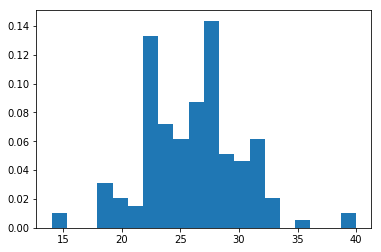

In [12]:
np.random.seed(666)
mu, sigma = 26, 4 # mean and standard deviation
count, bins, ignored = plt.hist(age, 20, density=True)
plt.show()

#### Hours Trained

The next factor the has a negative impact on the performance is where a athletes over or under train. The optimal training will depend on the athletes discipline but the average hours trained is 6 hours per day.

Where an athlete overtrains this is know as the overtraining syndrome. This is clearly an issue for athletes and coaches at elite level. This is defined as an undesirable training outcome with negative performance development as an end result, potentially being a factor contributing to athlete burnout (Kenttä & Hassmèn, 1998). [[Believe]](https://believeperform.com/performance/overtraining-how-to-prevent-it/). Other factors include insomnia, physcology and recovery.

There are many reasons for undertraining – more skilled athletes usually undertrain due to lack of confidence and anxiety around fear of not winning and winning. However, motivation is a top reason for less skilled athletes who undertrain.[[DR]]( https://drmichellecleere.com/blog/undertraining-and-overtraining/)

Let's create a randomly set of data points for 150 athletes. Similar to the age factor, training hours also has a normal distribution.

In [13]:
#Randomly generate hours per day between 3 and 10 for a 150 data points
tra = np.random.normal(6,1, size=150).round(0)
tra

array([ 7.,  6.,  7.,  7.,  5.,  6.,  6.,  5.,  7.,  5.,  7.,  5.,  7.,
        5.,  6.,  6.,  5.,  5.,  4.,  6.,  4.,  7.,  6.,  7.,  6.,  7.,
        8.,  5.,  5.,  6.,  5.,  7.,  6.,  5.,  6.,  6.,  5.,  5.,  7.,
        6.,  6.,  7.,  6.,  6.,  5.,  5.,  6.,  6.,  6.,  7.,  6.,  8.,
        6.,  6.,  7.,  7.,  6.,  4.,  4.,  6.,  3.,  9.,  6.,  5.,  7.,
        6.,  5.,  7.,  6.,  7.,  6.,  7.,  6.,  7.,  5.,  8.,  7.,  6.,
        7.,  7.,  5.,  6.,  6.,  7.,  5.,  5.,  5.,  6.,  4.,  6.,  4.,
        6.,  6.,  5.,  5.,  8.,  6.,  5.,  7.,  8.,  7.,  7.,  5.,  8.,
        5.,  5.,  6.,  7.,  5.,  8.,  8.,  6.,  6.,  6.,  6.,  6.,  7.,
        4.,  6.,  5.,  4.,  4.,  6.,  7.,  7.,  5.,  6.,  4.,  7.,  5.,
        6.,  6.,  6.,  7.,  5.,  6.,  7.,  6.,  9.,  5.,  5.,  6.,  5.,
        6.,  5.,  5.,  3.,  6.,  7.,  6.])

In [14]:
a = numpy.array([ 6.,  7.,  4.,  5.,  8.,  5.,  8.,  7.,  6.,  4.,  4.,  5.,  7.,
        6.,  7.,  6.,  6.,  6.,  6.,  4.,  6.,  5.,  6.,  6.,  5.,  6.,
        5.,  6.,  7.,  6.,  6.,  7.,  8.,  7.,  6.,  6.,  8.,  6.,  7.,
        6.,  5.,  6.,  7.,  7.,  6.,  6.,  6.,  5.,  5.,  4.,  6.,  6.,
        5.,  7.,  4.,  4.,  5.,  6.,  5.,  6.,  7.,  6.,  6.,  9.,  7.,
        8.,  6.,  7.,  6.,  7.,  7.,  4.,  8.,  6.,  5.,  5.,  7.,  7.,
        6.,  7.,  6.,  6.,  7.,  7.,  4.,  6.,  5.,  7.,  5.,  7.,  8.,
        7.,  5.,  7.,  6.,  7.,  6.,  7.,  7.,  6.,  7.,  4.,  5.,  6.,
        8.,  6.,  6.,  6.,  6.,  7.,  6.,  7.,  6.,  5.,  6.,  6.,  8.,
        6.,  7.,  7.,  6.,  6.,  7.,  7.,  5.,  7.,  7.,  5.,  7.,  7.,
        7.,  5.,  6.,  6.,  5.,  5.,  6.,  4.,  4.,  6.,  4.,  6.,  7.,
        5.,  5.,  6.,  4.,  5.,  8.,  7.])
collections.Counter(a)

Counter({4.0: 14, 5.0: 27, 6.0: 56, 7.0: 42, 8.0: 10, 9.0: 1})

In [15]:
np.mean(train).round()

NameError: name 'train' is not defined

In [16]:
np.std(train).round()

NameError: name 'train' is not defined

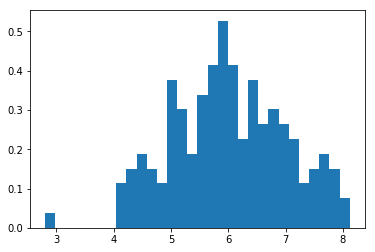

In [17]:
mu, sigma = 6, 1 # mean and standard deviation
y = np.random.normal(mu, sigma, 150)
count, bins, ignored = plt.hist(y, 30, density=True)
plt.show()

#### Alcohol

The another variable that has an effect on athletes performance is whether the athlete is a alcohol. Alcohol can  affect endurance,  reaction time and recovery. 

In relation to endurance.- the blood sugar your body needs for energy is produced by the liver when it releases glucose into the blood stream. Drinking alcohol in the 48 hour period before competing or training reduces your body’s ability to produce this sugar, so you have less energy and less endurance capacity. Alcohol also impair the absorption of nutrients such as zinc (energy metabolism), vitamins B1 and B12 (healthy blood, oxygen transport). Alcohol can affect the production of adenosine triphosphate (ATP), which is your muscles' source of energy. [[Ask]](http://www.askaboutalcohol./health/sports-performance/)

Reaction time - Alcohol is a sedative and it can affect your sports performance for up to 72 hours after you have finished drinking. Some team-game players think they have less tension and increased relaxation as a result of alcohol. The actual result, however, is poorer hand-eye coordination and slower responses. [[Ask]](http://www.askaboutalcohol./health/sports-performance/)

Recovery - Alcohol’s effect on sleep can reduce the amount of human growth hormone (HGH) in your body. HGH is part of normal muscle building and repair processes. Alcohol can also reduce testosterone, which is needed for muscle development and recovery.
[[Ask]](http://www.askaboutalcohol./health/sports-performance/)





In [18]:
# Fixing random state for reproducibility
np.random.seed(555555)

alco = np.random.choice(["No", "Yes"], size=150)
alco

array(['Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Y

In [19]:
len(alco)

150

In [20]:
b = numpy.array(['Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes'])
collections.Counter(b)

Counter({'No': 85, 'Yes': 65})

#### Calories

Most people have heard the general recommendation that adults eat about 2,000 calories per day. For athletes, however, that may not be enough. As people who ask a lot of their bodies, athletes need extra calories to fuel their activities and to encourage muscles and bones to continue strengthening. [[Calories]]( https://healthyeating.sfgate.com/caloric-needs-athletes-7179.html)

Each athlete will need to consume enough calories in order to perform at their best depending on their discipline but overall the average for an elite athletes is over 3000 calories per day. Eating the right amount of food at the right times is important for athletes because it helps build and fuel muscles. Carbohydrates and fat help fuel performance, while protein helps build muscle. A lack of water can decrease the effectiveness of workouts and cause cramping during competition. Sports drinks help athletes not only stay hydrated during games, matches and races, but also restore depleted glycogen, sodium, potassium and other electrolytes. [[Healthy]]( https://healthyliving.azcentral.com/list-factors-influencing-athletic-performance-4356.html)

In [21]:
cal = np.random.normal(3000,1000,size=150).round()
cal

array([ 3318.,  1818.,  3582.,  3884.,  4375.,  3565.,  4725.,  2095.,
        2485.,  3842.,  1970.,  3042.,  5004.,  3428.,  2291.,  1774.,
        2703.,  4945.,  1029.,  3265.,  2562.,  4007.,  4137.,   719.,
        3676.,  2634.,  3032.,  4454.,  2504.,  3219.,  4375.,  2859.,
        3101.,  2654.,  3259.,  3501.,   787.,  3456.,  4639.,  4113.,
        2573.,  3097.,  2838.,  3320.,  4623.,  2378.,  2224.,  2642.,
        2499.,  4025.,  1913.,  2747.,  2443.,  2052.,  2422.,  2412.,
        3104.,  2419.,  3591.,  2908.,  1515.,  1645.,  2914.,  3521.,
        2772.,  5344.,  3259.,  3495.,  3835.,  2200.,  2078.,  3443.,
        2417.,  1205.,  2471.,  3371.,  1994.,  2130.,  3400.,  1402.,
        2687.,  2748.,  3805.,  2469.,  1634.,  4206.,  2153.,  3121.,
        1701.,  2873.,  3524.,  4213.,  4113.,  3966.,  5480.,  2473.,
        3912.,  3691.,  2733.,   612.,  2017.,  3296.,  1639.,  2158.,
        4101.,  2736.,  2622.,  4358.,  4825.,  3027.,  1538.,  2368.,
      

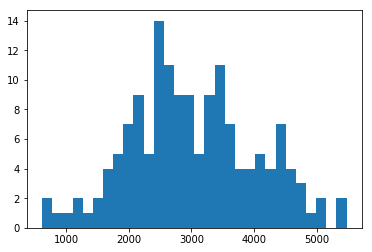

In [22]:
count, patch, ignored = plt.hist(cal, 30, density=False)
plt.show()

#### Recovery

Many athletes complain that the ability to recover from hard bouts of exercise diminishes. This can affect the intensity and volume of training of all athletes. But in many contact sports, such as professional American football or rugby, recovering from injuries and the cumulative effects of hard hits becomes the limiting factor in continuing to play at the highest level.[[Mashable]]( https://mashable.com/2015/07/07/aging-athletic-performance/?europe=true#YZXRDfVzwaqZ)

Building recovery time into any training program is important because this is the time that the body adapts to the stress of exercise and the real training effect takes place. Recovery also allows the body to replenish energy stores and repair damaged tissues. Recovery time allows these stores to be replenished and allows tissue repair to occur. Without sufficient time to repair and replenish, the body will continue to breakdown from intensive exercise. [[Well]]( https://www.verywellfit.com/the-benefits-of-rest-and-recovery-after-exercise-3120575)

A crucial part of recovery is sleep. Studies show that an appropriate amount of sleep can improve speed, accuracy, and reaction time in athletes. For an ordianary person, the average amount of sleep is 8 hours. Athletes would need more and there average amount of sleep is closer to 9 hours per day.

In [23]:
a, m = 8, 8.  # shape and mode
rec = ((np.random.pareto(a, 150) + 1) * m).round()
rec

array([  9.,   8.,   9.,   8.,  15.,  11.,   9.,   9.,   8.,   8.,   8.,
         8.,   8.,   9.,   9.,   8.,   9.,  10.,   9.,   9.,  10.,   8.,
         8.,   9.,   8.,   8.,   8.,   8.,   9.,   9.,  10.,   9.,   8.,
         8.,   9.,   8.,   9.,   8.,   9.,  10.,  12.,   8.,   8.,   9.,
         8.,   8.,   9.,   9.,   8.,  10.,   9.,   8.,  10.,  11.,   9.,
        10.,  12.,  10.,   9.,   8.,   8.,  11.,   8.,   9.,  10.,   9.,
         9.,   9.,   8.,  12.,   8.,   9.,   9.,  10.,   9.,  10.,   8.,
         9.,   8.,   9.,   8.,   9.,  10.,   9.,   8.,   9.,   9.,  10.,
         8.,   9.,   8.,   9.,   9.,  11.,   9.,  10.,  14.,  15.,   9.,
         9.,   9.,   8.,  12.,   9.,   8.,   8.,   8.,   8.,  10.,   9.,
         9.,  10.,  10.,   8.,   8.,   8.,   8.,   8.,   8.,  10.,   8.,
        12.,   9.,   9.,   8.,   8.,   8.,   9.,   9.,  11.,   9.,   8.,
         9.,   8.,  11.,  10.,  10.,  10.,   8.,   8.,   9.,   8.,   8.,
         9.,   8.,   9.,   8.,   9.,   9.,   8.])

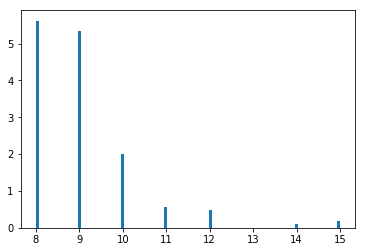

In [24]:
count, bins, _ = plt.hist(rec, 100, normed=True)
plt.show()

## Age vs Recovery

There has been a lot of research about whether the older an athlete becomes the longer it takes to recover. Some research has indicated the age is not a factor in recovery while others think the opposite. BUt the most comprehensive research we found indicates that older athletes do take longer to recovery. But this is more to do master athletes rather than professional athletes so these factors have no relevant. From thes studies undertaken by Master Athletes in Australia, they have concluded that regular training into later life by masters athletes does not appear to offset the age-related impairments in muscle protein metabolism. We also conclude that higher protein feedings may be beneficial to recovery for subsequent training or competition performance in masters athletes.[[Master]]( http://www.mastersathlete.com.au/2017/03/weve-proved-it-older-athletes-do-take-longer-to-recover/)

## Trained vs Recovery

In [38]:
hours = pd.DataFrame(data={'Recovery': rec, 'Train': tra})
hours.head()

,Recovery,Train
0,9.0,7.0
1,8.0,6.0
2,9.0,7.0
3,8.0,7.0
4,15.0,5.0


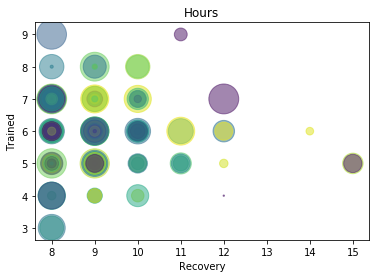

In [48]:
# Create a scatter plot showing recovery hours vs trained hours
x = rec
y = tra
colors = np.random.rand(150)
area = (30 * np.random.rand(150))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title("Hours")
plt.xlabel("Recovery")
plt.ylabel("Trained")
plt.show()

In [ ]:
find the optimal point 

In [ ]:
factors 1. age 2. training per hours 3. alco 4 calories 5. recovery

## Dataframe

In [ ]:
df = pd.DataFrame(data={'Age': age, 'Train': train, 'Alcohol': alco, 'Calories': cal, 'Recovery': rec})
df

algorithm to analyse data

In [ ]:
#https://matplotlib.org/gallery/statistics/histogram_multihist.html#sphx-glr-gallery-statistics-histogram-multihist-py

Benefits in sport

## References

[1] https://www.irishexaminer.com/breakingnews/sport/gaa/10-statistics-that-will-cause-alarm-for-the-gaa-870028.html

[2] http://theconversation.com/how-does-aging-affect-athletic-performance-36051

[3] https://www.joefrielsblog.com/2017/01/how-important-is-training-volume.html

[4] http://blog.isportsanalysis.com/what-sport-performance-analysis/

[5] http://www.askaboutalcohol.ie/health/sports-performance/

[6] https://believeperform.com/performance/overtraining-how-to-prevent-it/

[7] https://drmichellecleere.com/blog/undertraining-and-overtraining/

[8] https://www.voanews.com/a/professional-athletes-prepare-for-life-after-sports-118377659/163130.html

[9] https://healthyeating.sfgate.com/caloric-needs-athletes-7179.html

[10] https://www.npr.org/sections/thesalt/2012/07/24/157317262/how-many-calories-do-olympic-athletes-need-it-depends?t=1543683876145

[11] https://www.verywellfit.com/the-benefits-of-rest-and-recovery-after-exercise-3120575

[12] http://www.mastersathlete.com.au/2017/03/weve-proved-it-older-athletes-do-take-longer-to-recover/